In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import scipy.stats as stats
%matplotlib inline

In [3]:
raw_data = pd.read_csv("accepted_data.csv")

C:\Users\shaba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
data = raw_data[["loan_amnt","term","int_rate","installment","grade","annual_inc"]]

In [230]:
raw_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646774e+06,1.646421e+06,1.646749e+06,1.646778e+06,...,5778.0,5778.000000,5778.0,5778.000000,4822.000000,5778.000000,5778.000000,13290.000000,13290.000000,13290.000000
mean,NaN,1.473331e+04,1.472608e+04,1.470244e+04,1.321857e+01,4.394122e+02,7.730483e+04,1.852473e+01,3.344311e-01,6.957068e+02,...,3.0,151.587664,3.0,11.108688,446.130348,11607.266805,185.757715,5389.960476,48.485745,10.579910
std,NaN,8.803698e+03,8.800813e+03,8.805917e+03,4.704294e+00,2.592256e+02,1.207276e+05,1.098422e+01,9.048755e-01,3.130254e+01,...,0.0,123.463493,0.0,10.287269,361.855546,7459.800633,199.735241,3831.509446,8.995510,8.853511
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.320000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,82.960000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.760000e+00,2.517700e+02,4.600000e+04,1.207000e+01,0.000000e+00,6.700000e+02,...,3.0,58.932500,3.0,0.000000,173.347500,5709.287500,27.100000,2488.140000,45.000000,1.000000
50%,NaN,1.260000e+04,1.260000e+04,1.250000e+04,1.274000e+01,3.770400e+02,6.500000e+04,1.789000e+01,0.000000e+00,6.900000e+02,...,3.0,118.780000,3.0,11.000000,352.635000,10130.580000,123.360000,4515.055000,45.305000,12.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.803400e+02,9.200000e+04,2.432000e+01,0.000000e+00,7.100000e+02,...,3.0,207.650000,3.0,20.000000,606.885000,15993.665000,284.692500,7307.060000,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,4.200000e+01,8.450000e+02,...,3.0,893.050000,3.0,37.000000,2679.150000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### Exploration

In [209]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc
count,1.646778e+06,1.646778e+06,1.646778e+06,1.646774e+06
mean,1.473331e+04,1.321857e+01,4.394122e+02,7.730483e+04
std,8.803698e+03,4.704294e+00,2.592256e+02,1.207276e+05
min,5.000000e+02,5.320000e+00,4.930000e+00,0.000000e+00
25%,8.000000e+03,9.760000e+00,2.517700e+02,4.600000e+04
50%,1.260000e+04,1.274000e+01,3.770400e+02,6.500000e+04
75%,2.000000e+04,1.599000e+01,5.803400e+02,9.200000e+04
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08


In [210]:
data.head()

,loan_amnt,term,int_rate,installment,grade,annual_inc
0,15000.0,60 months,12.39,336.64,C,78000.0
1,10400.0,36 months,6.99,321.08,A,58000.0
2,21425.0,60 months,15.59,516.36,D,63800.0
3,12800.0,60 months,17.14,319.08,D,125000.0
4,7650.0,36 months,13.66,260.20,C,50000.0


In [192]:
continious["grade3"] = data["grade"]

In [175]:
continious = data[['loan_amnt',"int_rate","installment","annual_inc"]]

In [215]:
continious["60_Month_Term"] = np.where(data["term"] == " 60 months",1,0)

In [216]:
continious

,loan_amnt,int_rate,installment,annual_inc,grade,60_Month_Term
0,15000.0,12.39,336.64,78000.0,3,1
1,10400.0,6.99,321.08,58000.0,1,0
2,21425.0,15.59,516.36,63800.0,4,1
3,12800.0,17.14,319.08,125000.0,4,1
4,7650.0,13.66,260.20,50000.0,3,0
5,9600.0,13.66,326.53,69000.0,3,0
6,2500.0,11.99,83.03,89000.0,2,0
7,16000.0,11.44,351.40,109777.0,2,1
8,23325.0,14.31,800.71,72000.0,3,0
9,5250.0,11.44,172.98,26000.0,2,0


In [217]:
continious_jittered = continious
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(continious_jittered.shape)),columns=continious_jittered.columns)
continious_jittered = continious_jittered.add(jitter)

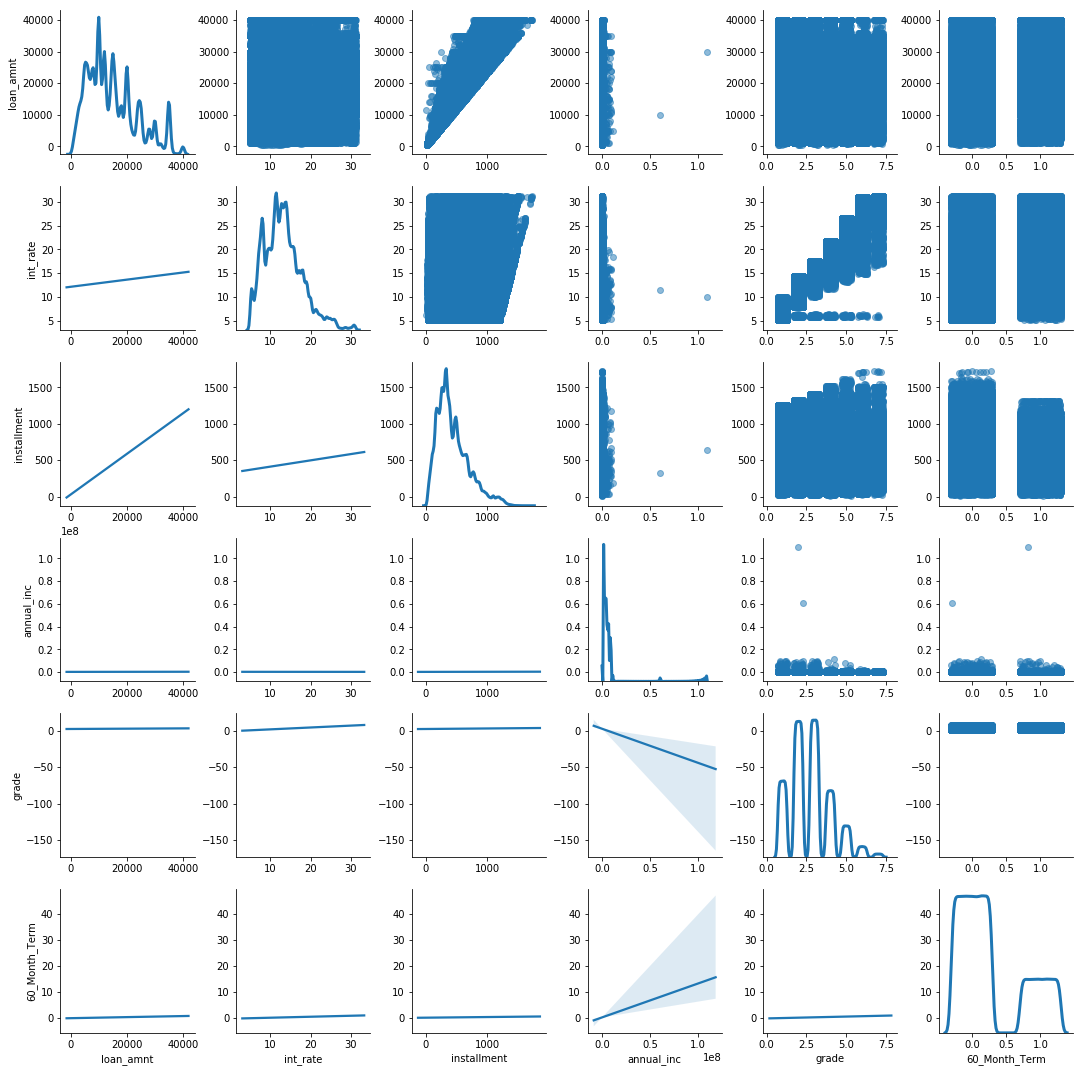

In [218]:
g=sns.PairGrid(continious_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [100]:
print(cat_cont.groupby("grade").describe())


      annual_inc                                                       \
           count          mean            std  min       25%      50%   
grade                                                                   
A       272720.0  90733.013340   90056.416478  0.0  55000.00  75000.0   
B       485360.0  78170.001167  193504.272138  0.0  48000.00  65000.0   
C       490784.0  74006.149154   68091.895114  0.0  45000.00  62800.0   
D       237512.0  70351.104263   58039.331429  0.0  42362.75  60000.0   
E       111961.0  71762.385841   56289.208747  0.0  45000.00  61000.0   
F        37411.0  72726.752504   48122.058264  0.0  45000.00  63400.0   
G        11026.0  75517.693956   51154.301481  0.0  47000.00  65000.0   

                             installment               ...    int_rate         \
            75%          max       count        mean   ...         75%    max   
grade                                                  ...                      
A      107000.0    9573072

In [221]:
corrmat = continious.corr()
print(corrmat)

               loan_amnt  int_rate  installment  annual_inc     grade  \
loan_amnt       1.000000  0.140534     0.946879    0.188455  0.142367   
int_rate        0.140534  1.000000     0.156380   -0.047049  0.952764   
installment     0.946879  0.156380     1.000000    0.180579  0.146438   
annual_inc      0.188455 -0.047049     0.180579    1.000000 -0.044350   
grade           0.142367  0.952764     0.146438   -0.044350  1.000000   
60_Month_Term   0.397808  0.395955     0.141923    0.035416  0.409195   

               60_Month_Term  
loan_amnt           0.397808  
int_rate            0.395955  
installment         0.141923  
annual_inc          0.035416  
grade               0.409195  
60_Month_Term       1.000000  


In [220]:
corrmat

,loan_amnt,int_rate,installment,annual_inc,grade
loan_amnt,1.000000,0.140534,0.946879,0.188455,0.142367
int_rate,0.140534,1.000000,0.156380,-0.047049,0.952764
installment,0.946879,0.156380,1.000000,0.180579,0.146438
annual_inc,0.188455,-0.047049,0.180579,1.000000,-0.044350
grade,0.142367,0.952764,0.146438,-0.044350,1.000000


In [203]:
continious.rename(columns={"grade2": "grade"},inplace=True)

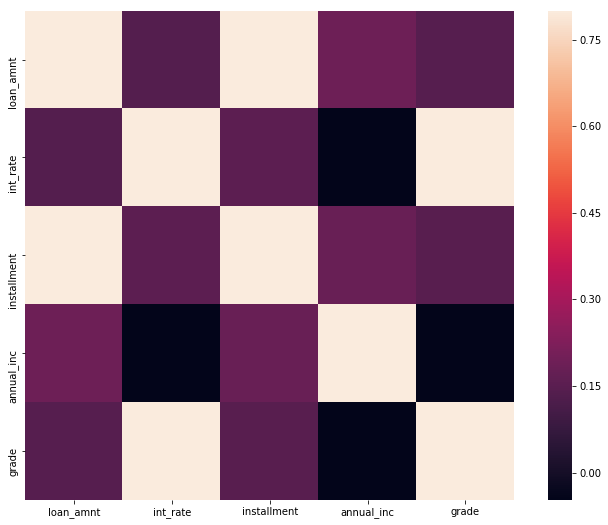

In [219]:
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat,vmax=.8, square=True)
plt.show()

In [117]:
#cat_cont = data[["loan_amnt","int_rate","installment","grade","annual_inc"]].dropna()
cat_cont = data[['loan_amnt',"int_rate","installment","annual_inc","grade","term"]].dropna()

cat_cont_long = cat_cont
cat_cont_long = pd.melt(cat_cont_long, id_vars="grade")

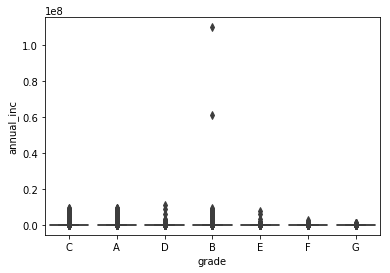

In [95]:
sns.boxplot(x="grade", y="annual_inc", data=cat_cont)


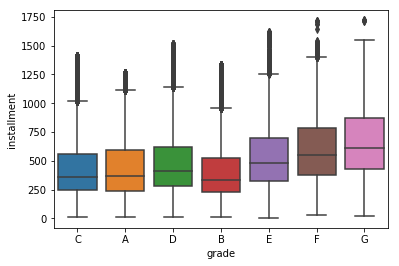

In [97]:
sns.boxplot(x="grade", y="installment", data=cat_cont)


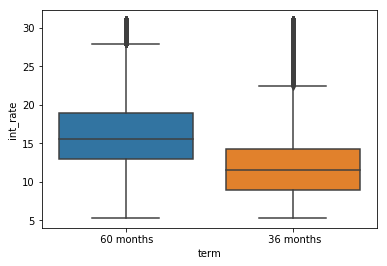

In [119]:
sns.boxplot(x="term", y="int_rate", data=cat_cont)

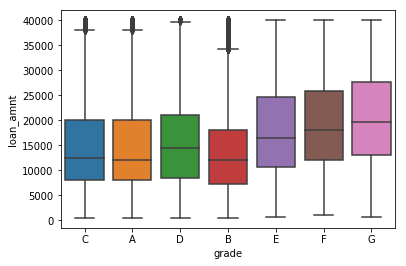

In [96]:
sns.boxplot(x="grade", y="loan_amnt", data=cat_cont)

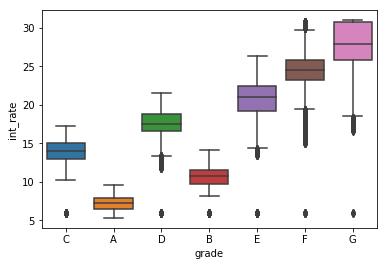

In [98]:
sns.boxplot(x="grade", y="int_rate", data=cat_cont)

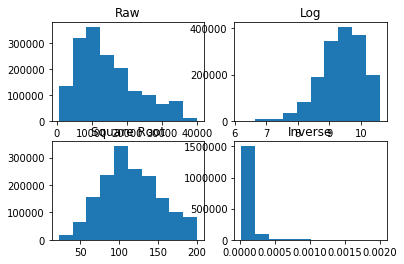

In [233]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data["loan_amnt"].dropna())
plt.title("Raw")

fig.add_subplot(222)
plt.hist(np.log(data["loan_amnt"].dropna()))
plt.title("Log")

fig.add_subplot(223)
plt.hist(np.sqrt(data["loan_amnt"].dropna()))
plt.title("Square Root")

fig.add_subplot(224)
plt.hist(1/data["loan_amnt"].dropna())
plt.title("Inverse")
plt.show()

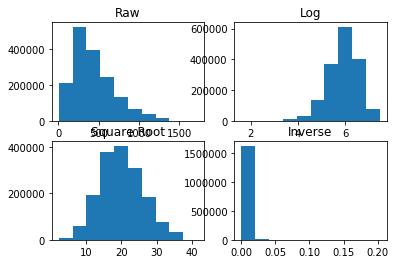

In [232]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data["installment"].dropna())
plt.title("Raw")

fig.add_subplot(222)
plt.hist(np.log(data["installment"].dropna()))
plt.title("Log")

fig.add_subplot(223)
plt.hist(np.sqrt(data["installment"].dropna()))
plt.title("Square Root")

fig.add_subplot(224)
plt.hist(1/data["installment"].dropna())
plt.title("Inverse")
plt.show()

### Create Features

In [265]:
features = pd.get_dummies(data["grade"])

In [266]:
features["loan_amnt_square_root"] = np.sqrt(data["loan_amnt"])
features["installment_square_root"] = np.sqrt(data["loan_amnt"])

In [267]:
features["60_Month_Term"] = np.where(data["term"] == " 60 months",1,0)

In [116]:
#Create category or normalize?
#features["big_loan"] = np.where(data["loan_amnt"] >20000,1,0)

In [112]:
data["loan_amnt"].describe()

count    1.646778e+06
mean     1.473331e+04
std      8.803698e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.260000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [113]:
data["loan_amnt"].median()

12600.0

In [264]:
features.head(5)

,A,B,E,F,G,loan_amnt_square_root,installment_square_root,60_Month_Term
0,0,0,0,0,0,122.474487,122.474487,1
1,1,0,0,0,0,101.980390,101.980390,0
2,0,0,0,0,0,146.372812,146.372812,1
3,0,0,0,0,0,113.137085,113.137085,1
4,0,0,0,0,0,87.464278,87.464278,0


In [268]:
filtered_features = features

In [269]:
filtered_features.drop(["C","D","E","F","G"], axis =1, inplace=True)


In [270]:
filtered_features.head()

,A,B,loan_amnt_square_root,installment_square_root,60_Month_Term
0,0,0,122.474487,122.474487,1
1,1,0,101.980390,101.980390,0
2,0,0,146.372812,146.372812,1
3,0,0,113.137085,113.137085,1
4,0,0,87.464278,87.464278,0
